In [8]:
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import plotly.express as px

#### Análise estatística de dados obtidos na disciplina de laboratório de análise instrumental.
#### Os dados logo abaixo são dados para gerar a curva de calibração, e os dados das amostras analisadas em laboratório.

In [9]:
curva_x = {"label": "Concentração",
            "info": "Concentração da curva do Fe",
            "data": [1, 2, 3, 4, 5]}

abs = lambda b, r: -math.log10(b/r)

curva_y = {
            "label": "ABS",
            "info": "ABS do Fe",
            "data": [abs(1.02, 1.27), 
                     abs(0.99, 1.53), 
                     abs(0.97, 1.91), 
                     abs(0.97, 2.41), 
                     abs(0.96, 3.03)]
          }

d = 25 * 2.5

reference_value = 166.67

measures = {"label": "ABS",
            "diluition": d,
            "data": [abs(0.96, 1.96), 
                     abs(0.96, 1.96), 
                     abs(0.96, 1.97),]}

In [10]:
def coeficientes(X, y):

    df = DataFrame()
    df['x'] = X
    df['y'] = y

    # passando os valores de x e y como Dataframes
    x_v = df[['x']]
    y_v = df[['y']]

    # criando e treinando o modelo
    model = LinearRegression()
    model.fit(x_v, y_v)

    #aplicando medidas na regressão
    try:
        if measures["label"] == curva_y["label"]:
            x_data = lambda y: ((y - model.intercept_[0])/ model.coef_[0][0]) * measures["diluition"]
            result = [ x_data(i) for i in measures["data"]]
            type_of_data = curva_x["label"]


        elif measures["label"] == curva_x["label"]:
            y_data = lambda x: (model.coef_[0][0] * x + model.intercept_[0]) * measures["diluition"]
            result = [ y_data(i) for i in measures["data"]]
            type_of_data = curva_y["label"]
    
    except:
        print("Erro nos dados de entrada")

    return {
        "Equação": f"{curva_y['label']} = {model.coef_[0][0]:.4f} x {curva_x['label']} + {model.intercept_[0]:.4f}",
        "Coeficiente angular": model.coef_[0][0],
        "Coeficiente linear": model.intercept_[0], 
        "R^2": model.score(x_v, y_v),
        f"Medidas ({measures['label']})": measures["data"],
        f"Resultado ({type_of_data})": result, 
        "Média": np.mean(result),
        "Desvio padrão amostral (s)": statistics.stdev(result),   
    }

In [11]:
data_dict = coeficientes(curva_x["data"], curva_y["data"])
data_items = data_dict.items()
data_list = list(data_items)

df = DataFrame(data_list)
df

,0,1
0,Equação,ABS = 0.1014 x Concentração + -0.0096
1,Coeficiente angular,0.101412
2,Coeficiente linear,-0.00965
3,R^2,0.999683
4,Medidas (ABS),"[0.30998483831690765, 0.30998483831690765, 0.3..."
5,Resultado (Concentração),"[196.9892255991305, 196.9892255991305, 198.351..."
6,Média,197.443261
7,Desvio padrão amostral (s),0.786413


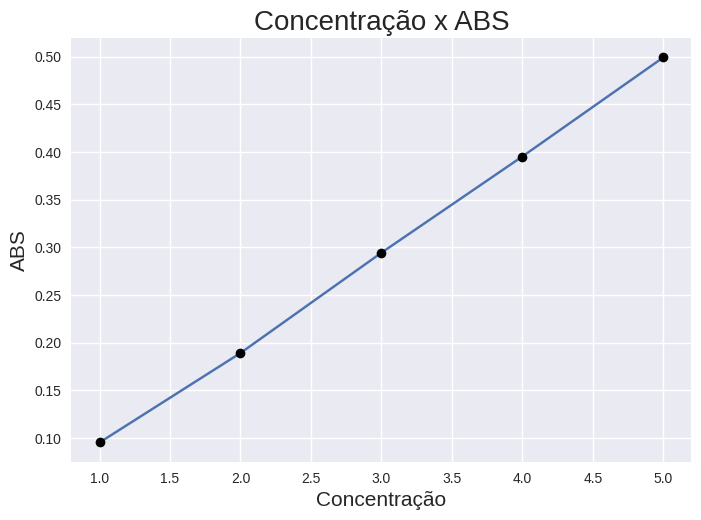

In [13]:
#GRÁFICO COM O MATPLOTLIB

plt.plot(curva_x["data"], curva_y["data"])
plt.plot(curva_x["data"], curva_y["data"], 'o', color='black')
plt.title(f"{curva_x['label']} x {curva_y['label']}", fontsize=20)
plt.xlabel(curva_x["label"], fontsize=15)
plt.ylabel(curva_y["label"], fontsize=15)
plt.show()